In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris['data']
y = iris['target']
target_names = iris['target_names']
feature_names = iris['feature_names']

In [5]:
df = pd.DataFrame(X, columns = feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['label'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [9]:
X_train.shape

(120, 4)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tree_model = DecisionTreeClassifier()

In [12]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = tree_model.predict(X_test)
y_pred

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [16]:
# cross_validation
from sklearn.model_selection import cross_val_score

In [18]:
val_score = cross_val_score(tree_model, X_train, y_train, cv = 10, scoring = 'accuracy')
val_score

array([1.        , 1.        , 1.        , 0.91666667, 0.91666667,
       1.        , 1.        , 0.91666667, 0.75      , 1.        ])

In [19]:
# avg acccuracy of our model
val_score.mean()

0.95

In [55]:
# hyperparameter tunning
param_grid = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'max_depth' : [2, 3, 4, 5, 6, 7, None]
}

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [64]:
model_1 = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', cv = 10)
model_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [65]:
model_1.best_score_

0.975

In [66]:
model_1.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

In [74]:
pd.DataFrame(model_1.cv_results_).loc[21]

mean_fit_time                                                 0.001153
std_fit_time                                                  0.000094
mean_score_time                                               0.000914
std_score_time                                                0.000063
param_criterion                                                entropy
param_max_depth                                                      5
param_splitter                                                  random
params               {'criterion': 'entropy', 'max_depth': 5, 'spli...
split0_test_score                                                  1.0
split1_test_score                                                  1.0
split2_test_score                                                  1.0
split3_test_score                                                  1.0
split4_test_score                                             0.916667
split5_test_score                                                  1.0
split6

In [67]:
model_2 = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', cv = 10)
model_2.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, None],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [68]:
model_2.best_score_

0.9666666666666666

In [69]:
model_2.best_params_

{'splitter': 'random', 'max_depth': 5, 'criterion': 'gini'}

### New Decision Tree Model After Hyperparameter Tunning

In [70]:
new_y_pred = model_1.predict(X_test)

In [71]:
print(classification_report(y_test, new_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [75]:
# Decsion Tree plot
from sklearn.tree import plot_tree

[Text(0.5, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]\nclass = setosa'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.6666666666666666, 0.7857142857142857, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]\nclass = versicolor'),
 Text(0.5, 0.6428571428571429, 'petal length (cm) <= 5.45\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'sepal length (cm) <= 4.95\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]\nclass = versicolor'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.5, 0.35714285714285715, 'petal length (cm) <= 4.95\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]\nclass = versicolor'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Te

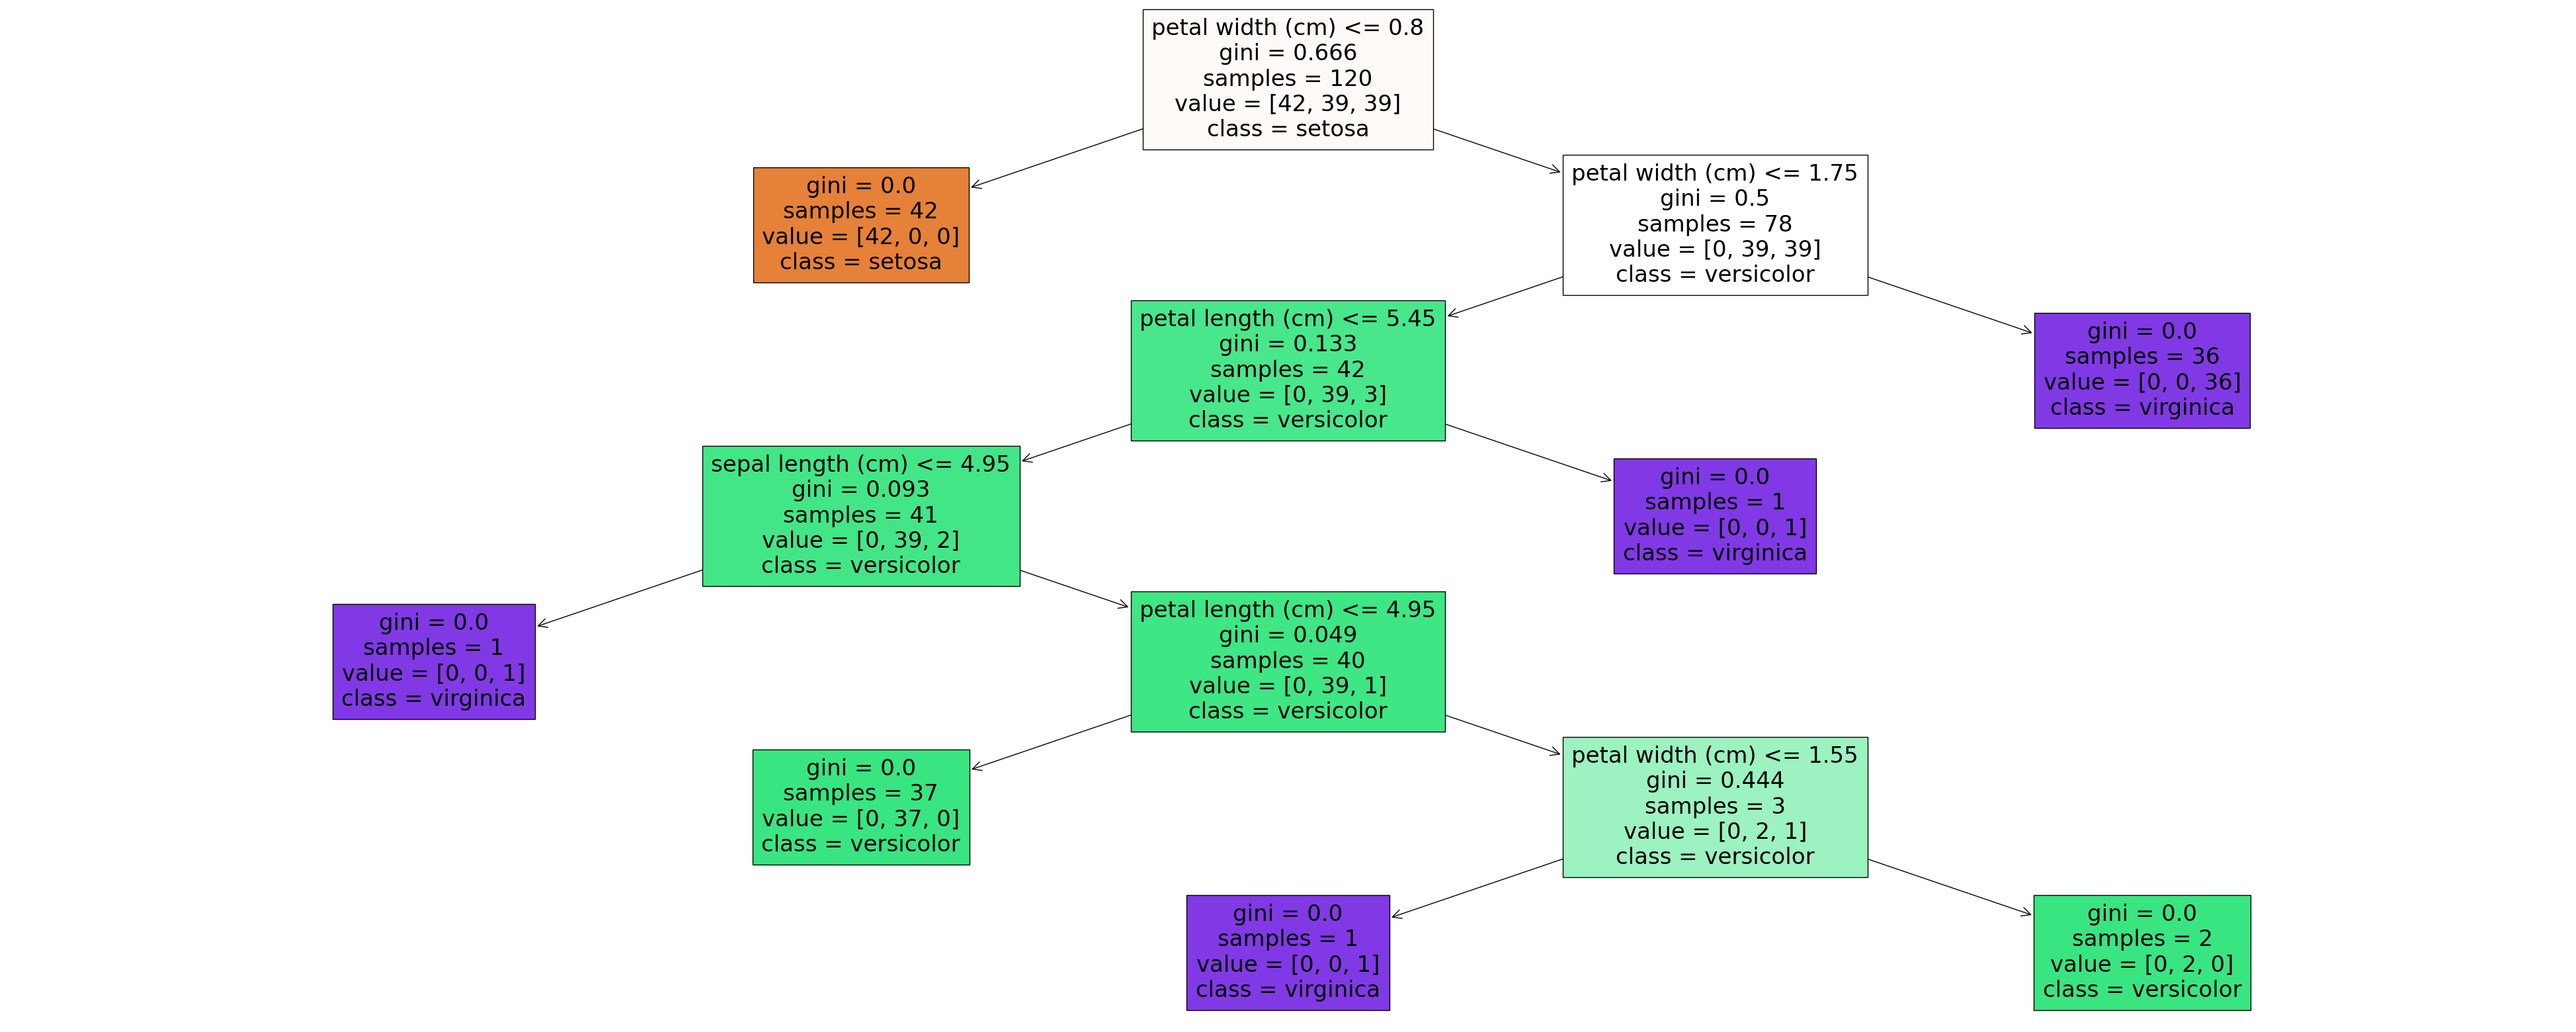

In [81]:
plt.figure(figsize = (50, 20))
plot_tree(tree_model, filled = True, feature_names = feature_names, class_names = target_names)